<a href="https://colab.research.google.com/github/jananilakshminarayanan/DA-DS-projects/blob/main/Analyzing_Name_Trends_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Python for DS - Project 1: Analysing Naming trends using python

### Step 1: Load required libraries

In [ ]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import os, glob
import matplotlib.pyplot as plt
%matplotlib inline

### Step 2: Download the zip file names from project url site and unzip data into a specific folder

In [ ]:
with ZipFile(r'C:\Users\dell\Desktop\python_for_DS\names.zip') as z:
    z.extractall(r'C:\Users\dell\Desktop\python_for_DS\namesdf')


### Step 3: load all the unzipped files data into a pd DataFrame and analyze the data

In [ ]:
# Define relative path to folder containing the text files

files_folder = r'C:\Users\dell\Desktop\python_for_DS\namesdf'
files = []

# Create a dataframe list by iterating pd.read_csv in a for loop
# using path.join we are concatenating all text file paths into a single user path
for file in glob.glob(os.path.join(files_folder ,"*.txt")):
    name=pd.read_csv(file, delimiter=',', names =['name', 'sex', 'no.of.births'])
    year = "".join(filter(lambda i: i.isdigit(), file)) # separate year i.e no digits from filename
    name['year'] = year
    files.append(name)

# Concatenate the list of DataFrames into one
files_df = pd.concat(files)
# first five entries
files_df.head()

,name,sex,no.of.births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [ ]:
files_df.tail() #last five entries

,name,sex,no.of.births,year
31532,Zyeire,M,5,2021
31533,Zyel,M,5,2021
31534,Zyian,M,5,2021
31535,Zylar,M,5,2021
31536,Zyn,M,5,2021


In [ ]:
# total entries and shape of df
files_df.shape

(2052781, 4)

In [ ]:
# no of unique names in the df
print("Number of Names: {}".format(files_df.name.unique().shape[0])) # unique() gives mon repetitive data and shape gives count value

Number of Names: 101338


In [ ]:
# total no of male and female births
files_df.groupby('sex')['no.of.births'].sum()

sex
F    179027755
M    182860478
Name: no.of.births, dtype: int64

### Note - The glob() function returns an array of filenames or directories matching a specified pattern. We can use it to search for files where filename matches a certain pattern by using wildcard characters. for eg: here we have searched text files by using ".txt"


### Step 4: Visualize no of male and female babies born in a particular year using plots and graphs

In [ ]:
# no of boy and girl babies born each year - analysis using pivot table
babies_pivot = files_df.pivot_table(index='sex', columns='year', values='no.of.births', aggfunc=np.sum, margins=True)
babies_pivot

year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,All
sex,,,,,,,,,,,,,,,,,,,,,
F,90994,91953,107847,112319,129019,133055,144533,145982,178622,178366,...,1752777,1784227,1782611,1769164,1723043,1696917,1673030,1609171,1627098,179027755
M,110490,100737,113686,104625,114442,107799,110784,101411,120851,110580,...,1889640,1918546,1914078,1894723,1847191,1811738,1788414,1718248,1734277,182860478
All,201484,192690,221533,216944,243461,240854,255317,247393,299473,288946,...,3642417,3702773,3696689,3663887,3570234,3508655,3461444,3327419,3361375,361888233


<AxesSubplot:xlabel='year'>

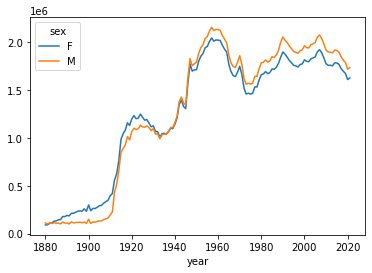

In [ ]:
# visualize no of male and female babies born in each year using df plots
files_df.pivot_table('no.of.births', index='year',columns='sex',aggfunc='sum').plot()


### Step 5: Analyse baby names by sorting out top 100 births and find out popular names by using grouping method

In [ ]:
# top 100 baby names sorted in ascending order
top_100 = files_df.groupby(['year','sex']).apply(lambda i: i.sort_values('no.of.births',ascending=False)[:100])
top_100

name sex  no.of.births  year
year sex                                         
1880 F   0           Mary   F          7065  1880
         1           Anna   F          2604  1880
         2           Emma   F          2003  1880
         3      Elizabeth   F          1939  1880
         4         Minnie   F          1746  1880
...                   ...  ..           ...   ...
2021 M   17640     Connor   M          3752  2021
         17639     Austin   M          3752  2021
         17641     Carson   M          3751  2021
         17642    Dominic   M          3727  2021
         17643     Xavier   M          3707  2021

[28400 rows x 4 columns]

### From the above data table it is clear that in the year 1880 - Mary is the most popular female baby name. Likewise in the year 2021 - Connor is the most popular male baby name. Results should be interpreted in a similar vein

In [ ]:
# create a set of unique names present in top 100 list
names_group = pd.Series(top_100.name.unique())
names_group

0           Mary
1           Anna
2           Emma
3      Elizabeth
4         Minnie
         ...    
852       Athena
853       Waylon
854      Bennett
855         Beau
856       Weston
Length: 857, dtype: object

In [ ]:
# find out the count of names starting with a specific alphabet
print("Names starting with letter 'S': \n {}".format(names_group[names_group.str.upper().str.startswith('S')]))

Names starting with letter 'S': 
 9          Sarah
59        Stella
63        Sallie
68         Susie
73         Sadie
79         Susan
116       Samuel
135          Sam
183      Stephen
194       Sidney
231      Stanley
271       Sylvia
287       Sophie
297      Shirley
339        Sally
355       Sandra
360       Sharon
376          Sue
379      Suzanne
382       Steven
384       Sheila
392        Steve
395       Sherry
419        Scott
466    Stephanie
474       Sherri
484        Shawn
485       Stacey
487       Shelly
490         Sean
492        Stacy
501      Shannon
514        Shane
548         Sara
564     Samantha
569      Sabrina
577        Shaun
592         Seth
610       Sheena
652       Shelby
666      Spencer
668       Sierra
669     Savannah
673       Sydney
680       Selena
690       Sophia
715    Sebastian
739        Sofia
777     Serenity
785     Scarlett
793       Skylar
817       Sawyer
834     Santiago
851        Silas
dtype: object


In [ ]:
print("Names starting with letter 'A': \n {}".format(names_group[names_group.str.upper().str.startswith('A')]))

Names starting with letter 'A': 
 1         Anna
7        Alice
10       Annie
32         Ada
53       Agnes
        ...   
813     Aurora
819    Adeline
841       Axel
843       Arya
852     Athena
Length: 75, dtype: object


In [ ]:
# top 100 Female namme in 1991
print("Top 100 Female names in 1991: \n {}".format(top_100.loc[['1991']][top_100.sex == 'F']))

C:\Users\dell\AppData\Local\Temp\ipykernel_11172\1198913816.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print("Top 100 Female names in 1991: \n {}".format(top_100.loc[['1991']][top_100.sex == 'F']))


Top 100 Female names in 1991: 
                   name sex  no.of.births  year
year sex                                      
1991 F   0      Ashley   F         43481  1991
         1     Jessica   F         43398  1991
         2    Brittany   F         29091  1991
         3      Amanda   F         28893  1991
         4    Samantha   F         25647  1991
...                ...  ..           ...   ...
         95    Melanie   F          3580  1991
         96  Gabrielle   F          3578  1991
         97      Julie   F          3570  1991
         98    Kaitlin   F          3486  1991
         99   Veronica   F          3441  1991

[100 rows x 4 columns]


### In a similar vein any no of popular trends or detailed analysis can be figured out from the baby names database